# Visualización de Datos con Matplotlib y Seaborn

Curso: **Fundamentos de Programación y Analítica de Datos con Python**

**Duración estimada del bloque:** 2 horas

## Objetivos específicos
- Construir visualizaciones básicas (líneas, barras y dispersión) usando Matplotlib y Seaborn.
- Aplicar estilos, títulos, ejes y leyendas siguiendo buenas prácticas de comunicación visual.
- Comparar la API imperativa (stateful) de Matplotlib con el enfoque orientado a objetos.
- Emplear Seaborn para visualizaciones estadísticas con datos en DataFrames.
- Guardar figuras con parámetros de resolución y tamaño adecuados para informes.

## Prerrequisitos
- Conocimientos básicos de Python (variables, listas, funciones) y manejo de entornos (venv/conda).
- Nociones elementales de Pandas (DataFrame) son deseables pero no obligatorias.


## Tema 1. Fundamentos de Matplotlib

### Definición
Matplotlib es una biblioteca de visualización 2D para Python que permite crear gráficos de alta calidad de forma programable. Ofrece dos estilos principales: una API **stateful** (similar a MATLAB) mediante `pyplot` y una API **orientada a objetos** donde el usuario manipula explícitamente objetos `Figure` y `Axes`.

### Importancia en programación y analítica de datos
- Es el **estándar de facto** para visualización en el ecosistema científico de Python.
- Proporciona control fino sobre cada elemento del gráfico (títulos, ejes, ticks, estilos, anotaciones), crucial para reportes técnicos.
- Sirve de base para bibliotecas de más alto nivel, como **Seaborn** y **Pandas plotting**.

### Buenas prácticas profesionales y errores comunes
- **Titular y etiquetar** siempre los ejes y unidades; evitar abreviaturas ambiguas.
- Preferir el enfoque **orientado a objetos** (`fig, ax = plt.subplots()`) para composiciones complejas.
- Usar `tight_layout()` o `constrained_layout=True` para evitar solapamientos.
- Ajustar `dpi`, `figsize` y `bbox_inches='tight'` al **guardar** figuras.
- Evitar excesos de color y estilo que distraigan; priorizar la legibilidad.


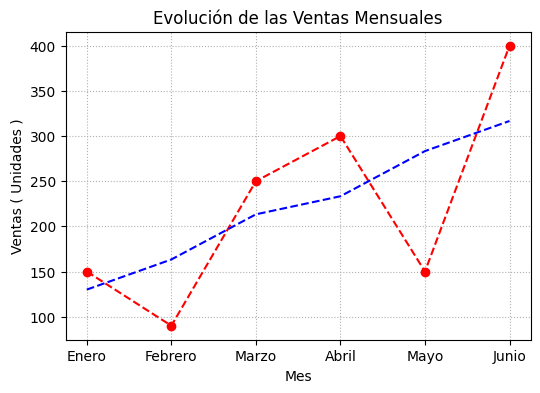

In [21]:

# TODO: Ejemplo 1 (Matplotlib - API stateful): gráfico de líneas básico
import matplotlib.pyplot as plt
import numpy as np

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
ventas = [150, 90, 250, 300, 150, 400]

x = np.arange(len(meses))
window = 3
kernel = np.ones(window)/window
ventas_padded = np.r_[ventas[0], ventas, ventas[-1]]  # padding simple
ventas_ma = np.convolve(ventas_padded, kernel, mode='valid')

plt.figure(figsize=(6, 4))
plt.plot(meses, ventas, marker='o', linestyle='--', color='r')
plt.plot(meses, ventas_ma, marker='', linestyle='--', color='b')
plt.title('Evolución de las Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas ( Unidades )')
plt.grid(True, linestyle=":", linewidth=0.8)
plt.show()


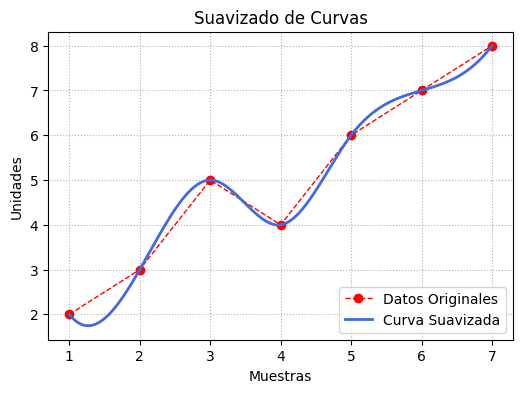

In [ ]:

#TODO: Ejemplo con suavizado de datos
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Datos originales
x = np.array([1, 2, 3, 4, 5, 6, 7])
y = np.array([2, 3, 5, 4, 6, 7, 8])

# Crear spline para suavizar
x_new = np.linspace(x.min(), x.max(), 500)
spl = make_interp_spline(x, y, k=3)  # k=3 → spline cúbico
y_smooth = spl(x_new)

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, y, color='red', marker='o', linestyle='--', lw=1)
plt.plot(x_new, y_smooth, color='royalblue', lw=2)
plt.title("Suavizado de Curvas")
plt.xlabel('Muestras')
plt.ylabel('Unidades')
plt.grid(True, linestyle=":", linewidth=0.8)
plt.legend(['Datos Originales', 'Curva Suavizada'], loc='lower right', frameon=True)
plt.show()

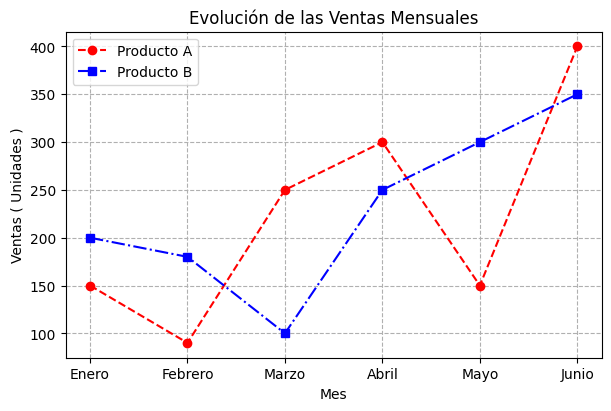

In [37]:

# TODO: Ejemplo 2 (Matplotlib - API orientada a objetos): dos series y personalización
import matplotlib.pyplot as plt

meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
ventas_A = [150, 90, 250, 300, 150, 400]
ventas_B = [200, 180, 100, 250, 300, 350]

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
ax.plot(meses, ventas_A, marker='o', linestyle='--', color='r', label='Producto A')
ax.plot(meses, ventas_B, marker='s', linestyle='-.', color='b', label='Producto B')
ax.set_xlabel('Mes')
ax.set_ylabel('Ventas ( Unidades )')
ax.set_title('Evolución de las Ventas Mensuales')
ax.legend(loc='upper left', frameon=True)
ax.grid(True, linestyle="--", linewidth=0.8)

### Gráficos de barras y dispersión en Matplotlib
Los gráficos de **barras** son útiles para comparar categorías discretas; los de **dispersión** muestran la relación entre dos variables numéricas, facilitando la identificación de correlaciones o patrones no lineales.


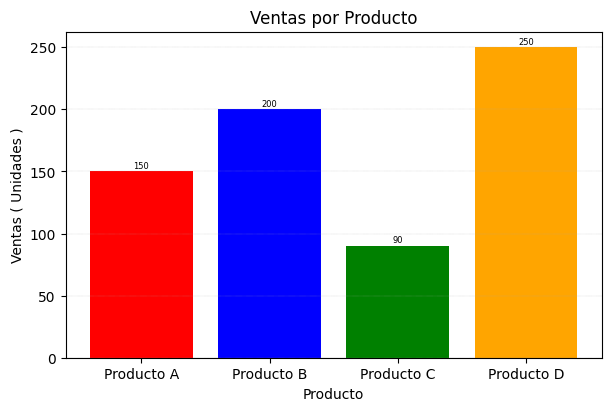

In [47]:

# TODO: Ejemplo 3 (Barras): comparación de ventas por producto
import matplotlib.pyplot as plt

productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D']
ventas = [150, 200, 90, 250]

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
ax.bar(productos, ventas, color=['r', 'b', 'g', 'orange'])
ax.set_xlabel('Producto')
ax.set_ylabel('Ventas ( Unidades )')
ax.set_title('Ventas por Producto')
ax.grid(axis='y', linestyle=":", linewidth=0.3)
for i, v in enumerate(ventas):
  ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=6)
plt.show()


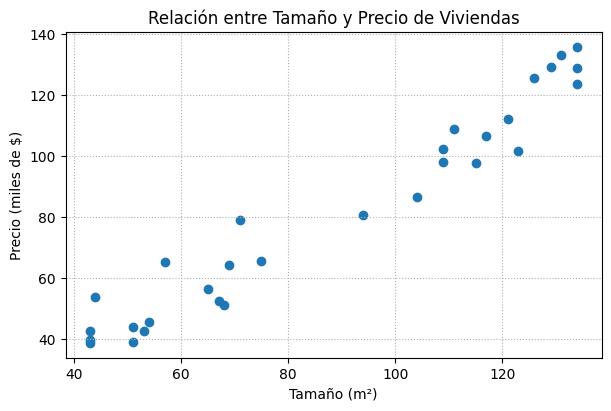

In [52]:

# TODO: Ejemplo 4 (Dispersión): relación entre tamaño y precio
import matplotlib.pyplot as plt
import random

random.seed(42)
tamanio_m2 = [random.randint(40, 150) for _ in range(30)]
precio_k = [0.9 * t + random.randint(-10, 15) for t in tamanio_m2]

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
ax.scatter(tamanio_m2, precio_k)
ax.set_title('Relación entre Tamaño y Precio de Viviendas')
ax.set_xlabel('Tamaño (m²)')
ax.set_ylabel('Precio (miles de $)')
ax.grid(True, linestyle=":", linewidth=0.8)
plt.show()

### Estilos, paletas y guardado de figuras
- Los **estilos** (`plt.style.use(...)`) permiten aplicar configuraciones coherentes para reportes.
- Las **paletas** deben ser legibles y, cuando sea posible, **accesibles** (por ejemplo, combinaciones aptas para personas con daltonismo).
- Para guardar figuras, usar `plt.savefig("nombre.png", dpi=300, bbox_inches='tight')`.


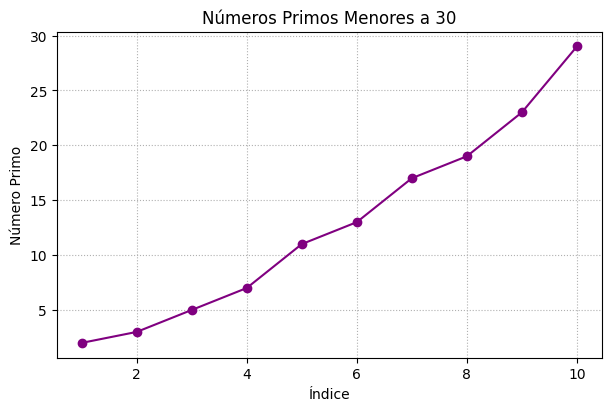

In [56]:

# TODO: Ejemplo 5 (Guardar figura con parámetros de calidad)
import matplotlib.pyplot as plt

x = list(range(1, 11))
y = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

fig, ax = plt.subplots(figsize=(6,4), constrained_layout=True)
ax.plot(x, y, marker='o', linestyle='-', color='purple')
ax.set_title('Números Primos Menores a 30')
ax.set_xlabel('Índice')
ax.set_ylabel('Número Primo')
ax.grid(True, linestyle=":", linewidth=0.8)
fig.savefig('numeros_primos.png', dpi=600, bbox_inches='tight')


## Tema 2. Visualización estadística con Seaborn

### Definición
Seaborn es una biblioteca de **alto nivel** que se construye sobre Matplotlib y facilita la creación de gráficos estadísticos con sintaxis concisa, operando directamente sobre **DataFrames** de Pandas. Incluye funciones para estimación de relaciones, visualización de distribuciones y comparaciones por categorías.

### Importancia en programación y analítica de datos
- Simplifica tareas comunes: gráficos por categorías, mapas de calor, regresiones y visualización de distribuciones.
- Integra estilos y paletas por defecto, acelerando la creación de visualizaciones **consistentes**.
- Favorece flujos de trabajo **exploratorios** al operar con datos tabulares de Pandas.

### Buenas prácticas profesionales y errores comunes
- Verificar tipos de datos (numéricos vs. categóricos) antes de graficar.
- Usar `hue`, `style` o `size` con moderación; demasiadas agrupaciones pueden dificultar la lectura.
- Documentar supuestos y **transformaciones** aplicadas a los datos (filtros, agregaciones, normalizaciones).


Text(0.5, 1.0, 'Ventas por Producto')

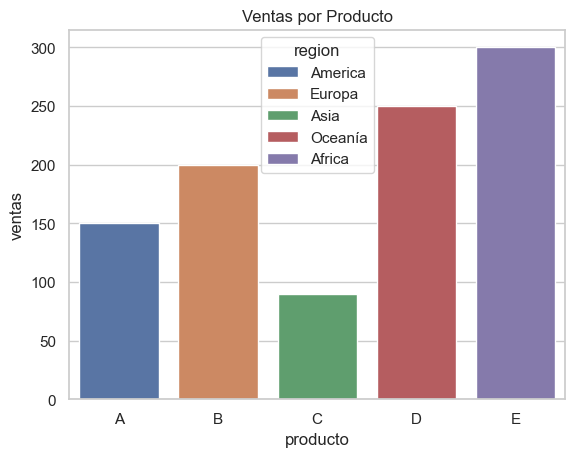

In [57]:

# TODO: Ejemplo 6 (Seaborn - barras): comparación por categoría
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.DataFrame({
  "producto": ['A', 'B', 'C', 'D', 'E'],
  "ventas": [150, 200, 90, 250, 300],
  "region": ['America', 'Europa', 'Asia', 'Oceanía', 'Africa']
})

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="producto", y="ventas", hue="region", data=df)
ax.set_title('Ventas por Producto')

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(0.5, 1.0, 'Relación entre Cuenta Total y Propina')

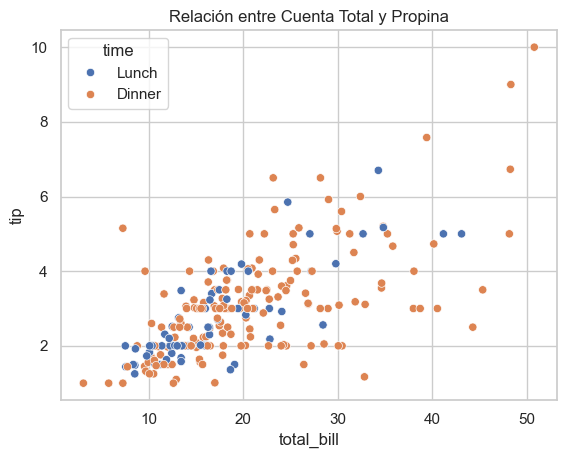

In [61]:

# TODO: Ejemplo 7 (Seaborn - dispersión con agrupación): relación y color por categoría
import seaborn as sns
tips = sns.load_dataset("tips")
print(tips.head())

ax = sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")
ax.set_title('Relación entre Cuenta Total y Propina')

          x         y
0  0.000000  5.292157
1  0.204082  1.710676
2  0.408163  3.956622
3  0.612245  8.253292
4  0.816327  7.643490
Axes(0.125,0.11;0.775x0.77)


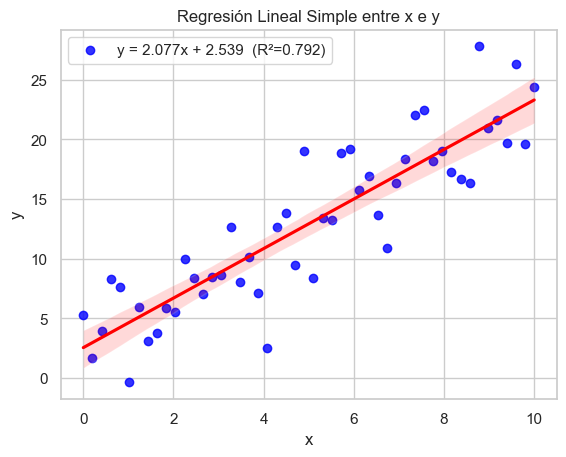

In [68]:

# TODO: Ejemplo 8 (Seaborn - regresión): estimación lineal simple
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)
x = np.linspace(0, 10, 50)
y = 2.5 * x + np.random.normal(scale=3, size=x.shape)
df = pd.DataFrame({'x': x, 'y': y})
print(df.head())

a, b = np.polyfit(df["x"], df["y"], 1)
y_hat = a*df["x"] + b
r2 = 1 - ((df["y"] - y_hat)**2).sum() / ((df["y"]-df["y"].mean())**2).sum()

ax = sns.regplot(x='x', y='y', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'}, label=f"y = {a:.3f}x + {b:.3f}  (R²={r2:.3f})")
ax.set_title('Regresión Lineal Simple entre x e y')
ax.legend()

print(ax)

### Estilos y paletas en Seaborn
Seaborn ofrece `set_theme`, `set_style` y paletas como `deep`, `muted`, `pastel`, `dark`, `colorblind`. Se recomienda `colorblind` para mejorar accesibilidad. Las leyendas, títulos y escalas deben reforzar la comunicación del mensaje principal.


Text(0.5, 1.0, 'Distribución de la Cuenta Total')

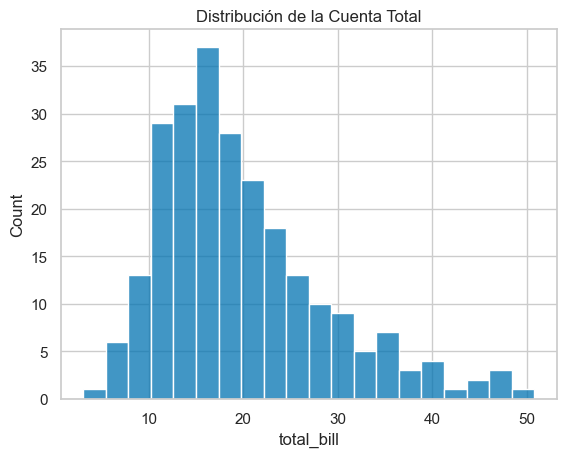

In [66]:

# TODO: Ejemplo 9 (Seaborn - estilos y paletas)
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")
ax = sns.histplot(data=tips, x="total_bill", bins=20)
ax.set_title('Distribución de la Cuenta Total')

## Ejercicios integradores

### Ejercicio 1: Informe de ventas trimestrales
**Contexto técnico:** Eres analista en una empresa de retail. Debes preparar un gráfico para el comité gerencial, mostrando la evolución de ventas trimestrales de dos líneas de producto y resaltando el trimestre con mayor incremento. El objetivo es facilitar la toma de decisiones sobre inversión en inventario.

**Datos/entradas:** Genera dos series de ventas trimestrales (4 a 8 puntos) para Línea A y Línea B.

**Requerimientos:** Crear un gráfico de líneas comparativo (Matplotlib, API orientada a objetos), con título, etiquetas, leyenda y anotación en el punto de mayor incremento.

**Criterios de aceptación:** El gráfico debe ser legible, con rejilla, e incluir una anotación (`ax.annotate`) que describa el trimestre de mayor crecimiento. Guardar la figura (comentado si no deseas escribir archivos).

**Pistas:** Usa `fig, ax = plt.subplots()`, calcula diferencias con `numpy.diff` y el índice del máximo con `argmax`.

In [ ]:

# TODO: Solución Ejercicio 1


### Ejercicio 2: Comparación por categoría con barras
**Contexto técnico:** Como parte de un reporte de marketing, debes comparar el rendimiento de 5 campañas. El gráfico debe permitir identificar rápidamente la mejor campaña y mostrar etiquetas con los valores.

**Datos/entradas:** DataFrame con columnas `campaña` y `conversiones` (valores enteros). Puedes generarlo manualmente o aleatoriamente.

**Requerimientos:** Crear un **barplot** (Seaborn) con título y etiquetas en cada barra. Mostrar el valor exacto encima de cada barra.

**Criterios de aceptación:** Barras ordenadas de mayor a menor, etiquetas legibles, y paleta apta para daltónicos.

**Pistas:** Usa `sns.barplot`, `ax.bar_label` (Matplotlib 3.4+), y `sns.set_palette('colorblind')`.


In [ ]:

# TODO: Solución Ejercicio 2


### Ejercicio 3: Relación y tendencia
**Contexto técnico:** En un estudio de precios inmobiliarios, necesitas visualizar la relación entre tamaño de vivienda (m²) y precio (USD), además de estimar una línea de tendencia.

**Datos/entradas:** Genera 60 observaciones con ruido (distribución normal) alrededor de una relación lineal.

**Requerimientos:** Crear un `scatterplot` (Seaborn) y superponer una **regresión lineal** (`sns.regplot`). Agregar título y etiquetas claras.

**Criterios de aceptación:** La figura debe mostrar los puntos, la línea de tendencia y comunicar correctamente variables y unidades.

**Pistas:** Genera datos con `numpy.random.normal` y controla la semilla para reproducibilidad.


In [ ]:

# TODO: Solución Ejercicio 3


### Ejercicio 4 (opcional): Distribuciones y estilo
**Contexto técnico:** Preparas un anexo metodológico para un informe de propinas en restaurantes. Debes visualizar la **distribución** de la variable `tip` y aplicar un estilo coherente de reporte.

**Datos/entradas:** Usa el dataset `tips` de Seaborn (`sns.load_dataset('tips')`).

**Requerimientos:** Graficar un histograma/densidad con `sns.histplot` o `sns.displot`, aplicar `sns.set_style('whitegrid')` y `sns.set_palette('colorblind')`. Añadir título y ejes descriptivos.

**Criterios de aceptación:** El gráfico debe ser claro, con bins adecuados (al menos 15–30), y leyendas si corresponde.

**Pistas:** Ajusta `bins` y considera `stat='density'` para comparar distribuciones.


In [ ]:

# TODO: Solución Ejercicio 4